# Ames Project Cleaning Notebook

In [10]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Load raw data

In [11]:
train = pd.read_csv("../data/train.csv", index_col='Id')
test = pd.read_csv("../data/test.csv", index_col='Id')

In [12]:
train.columns = [col.replace(' ','') for col in train.columns]
test.columns = [col.replace(' ','') for col in test.columns]

In [13]:
test.head()

,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


## Check for missing values and impute.

In [14]:
missing_cols = test.columns[test.isnull().sum()>0]
test[missing_cols].isnull().sum()

LotFrontage     160
Alley           821
MasVnrType        1
MasVnrArea        1
BsmtQual         25
BsmtCond         25
BsmtExposure     25
BsmtFinType1     25
BsmtFinType2     25
Electrical        1
FireplaceQu     422
GarageType       44
GarageYrBlt      45
GarageFinish     45
GarageQual       45
GarageCond       45
PoolQC          875
Fence           707
MiscFeature     838
dtype: int64

In [15]:
test.isnull().sum().sum(), train.isnull().sum().sum()

(4175, 9822)

### NOTE: Lot frontage could be zero for condominiums, but it does not appear to be the case based on the MS-Zoning descriptions.

### Garage-Yr-Blt could be set to the mean of Year-Built, assuming that garages are always built along with the single-family homes.  

In [16]:
train['LotFrontage'][train.LotFrontage.isnull()] = train['LotFrontage'].mean()  # 
test['LotFrontage'][test.LotFrontage.isnull()] = test['LotFrontage'].mean()  # 
train['Alley'][train.Alley.isnull()] = "None"
test['Alley'][test.Alley.isnull()] = "None"
train['MasVnrType'][train.MasVnrType.isnull()] = "None"
train['MasVnrArea'][train.MasVnrArea.isnull()] = 0
test['MasVnrType'][test.MasVnrType.isnull()] = "None"
test['MasVnrArea'][test.MasVnrArea.isnull()] = 0
train['BsmtQual'][train.BsmtQual.isnull()] = "None"
train['BsmtCond'][train.BsmtCond.isnull()] = "None"
test['BsmtQual'][test.BsmtQual.isnull()] = "None"
test['BsmtCond'][test.BsmtCond.isnull()] = "None"
train['BsmtExposure'][train.BsmtExposure.isnull()] = "None"
train['BsmtFinType1'][train.BsmtFinType1.isnull()] = "None"
test['BsmtExposure'][test.BsmtExposure.isnull()] = "None"
test['BsmtFinType1'][test.BsmtFinType1.isnull()] = "None"
train['BsmtFinSF1'][train.BsmtFinSF1.isnull()] = train['BsmtFinSF1'].mean()     #
train['BsmtFinType2'][train.BsmtFinType2.isnull()] = "No_basement"
test['BsmtFinType2'][test.BsmtFinType2.isnull()] = "No_basement"
train['BsmtFinSF2'][train.BsmtFinSF2.isnull()] = train['BsmtFinSF2'].mean()     #
train['BsmtUnfSF'][train.BsmtUnfSF.isnull()] = train['BsmtUnfSF'].mean()        #
train['TotalBsmtSF'][train.TotalBsmtSF.isnull()] = train['TotalBsmtSF'].mean()  #
train['BsmtFullBath'][train.BsmtFullBath.isnull()] = train['BsmtFullBath'].mean()#
train['BsmtHalfBath'][train.BsmtHalfBath.isnull()] = train['BsmtHalfBath'].mean()#
test['Electrical'][test.Electrical.isnull()] = "None"
train['FireplaceQu'][train.FireplaceQu.isnull()] = "None"
test['FireplaceQu'][test.FireplaceQu.isnull()] = "None"
train['GarageType'][train.GarageType.isnull()] = "None"
train['GarageYrBlt'][train.GarageYrBlt.isnull()] = train['YearBuilt'].mean()  #
train['GarageFinish'][train.GarageFinish.isnull()] = "None"
test['GarageType'][test.GarageType.isnull()] = "None"
test['GarageYrBlt'][test.GarageYrBlt.isnull()] = train['YearBuilt'].mean()  #
test['GarageFinish'][test.GarageFinish.isnull()] = "None"
train['GarageCars'][train.GarageCars.isnull()] = train['GarageCars'].mean()     #
train['GarageArea'][train.GarageArea.isnull()] = train['GarageArea'].mean()     #
train['GarageQual'][train.GarageQual.isnull()] = "None"
train['GarageCond'][train.GarageCond.isnull()] = "None"
test['GarageQual'][test.GarageQual.isnull()] = "None"
test['GarageCond'][test.GarageCond.isnull()] = "None"
train['PoolQC'][train.PoolQC.isnull()] = "None"
train['Fence'][train.Fence.isnull()] = "None"
train['MiscFeature'][train.MiscFeature.isnull()] = "None"
test['PoolQC'][test.PoolQC.isnull()] = "None"
test['Fence'][test.Fence.isnull()] = "None"
test['MiscFeature'][test.MiscFeature.isnull()] = "None"

/Users/perry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/perry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/perry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports u

/Users/perry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/perry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/perry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/perry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be s

In [17]:
print(train['GarageYrBlt'].dtype)
print(train['GarageYrBlt'].min(),
      train['GarageYrBlt'].max(),
      train['YearBuilt'].mean()
      )
train['GarageYrBlt'][train['PID'] == 916384070] = 2007.0

float64
1895.0 2207.0 1971.7089224768406


/Users/perry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
train[train['PID'] == 916384070].T

Id,2261
PID,916384070
MSSubClass,20
MSZoning,RL
LotFrontage,68
LotArea,8298
Street,Pave
Alley,None
LotShape,IR1
LandContour,HLS
Utilities,AllPub


In [19]:
mask1 = train['GrLivArea'] < 4500
train = train[mask1]
# mask = ['Gr Liv Area'] < 4500
# test = test[mask2]

## Remove 'Id' column

In [20]:
train.columns

Index(['PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDri

In [21]:
test.columns

Index(['PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDri

In [22]:
train.drop(['PID'],axis=1, inplace=True)
test.drop('PID',axis=1, inplace=True)

## Re-assign data types from Discrete Integer to Object.

In [23]:
train['GarageYrBlt'] = train['GarageYrBlt'].astype(int)
test['GarageYrBlt'] = test['GarageYrBlt'].astype(int)

In [24]:
train['MasVnrArea'] = train['MasVnrArea'].astype(int)
test['MasVnrArea'] = test['MasVnrArea'].astype(int)

In [25]:
train['MSSubClass'] = train['MSSubClass'].astype(object)
test['MSSubClass'] = test['MSSubClass'].astype(object)

In [26]:
                # train['BsmtBaths'] = train['BsmtFullBath'] + train['BsmtHalfBath']
                # test['BsmtBaths'] = test['BsmtFullBath'] + test['BsmtHalfBath']

In [27]:
               # train['Baths'] = train['FullBath'] + train['HalfBath']
               # test['Baths'] = test['FullBath'] + test['HalfBath']

In [28]:
train['MoSold'] = train['MoSold'].astype(object)
test['MoSold'] = test['MoSold'].astype(object)

## Check for duplicate observations

In [29]:
print('Duplicated values:', train.duplicated().sum())

Duplicated values: 0


## Use EDA to validate numeric columns for extreme values

In [30]:
train.select_dtypes([np.number]).describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2049.0,68.907377,20.582241,21.0,60.0,69.0552,78.0,313.0
LotArea,2049.0,10024.677892,6608.511749,1300.0,7500.0,9405.0000,11500.0,159000.0
OverallQual,2049.0,6.108346,1.421780,1.0,5.0,6.0000,7.0,10.0
OverallCond,2049.0,5.562714,1.104897,1.0,5.0,5.0000,6.0,9.0
YearBuilt,2049.0,1971.673499,30.171293,1872.0,1953.0,1974.0000,2001.0,2010.0
YearRemod/Add,2049.0,1984.166423,21.032785,1950.0,1964.0,1993.0000,2004.0,2010.0
MasVnrArea,2049.0,97.736945,171.936400,0.0,0.0,0.0000,158.0,1600.0
BsmtFinSF1,2049.0,438.020644,439.736222,0.0,0.0,368.0000,733.0,2188.0
BsmtFinSF2,2049.0,48.005837,165.034368,0.0,0.0,0.0000,0.0,1474.0
BsmtUnfSF,2049.0,567.525490,444.910878,0.0,220.0,475.0000,811.0,2336.0


### 'SalePrice' looks skewed.

In [31]:
train[train['Utilities'] != 'AllPub']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
956,20,RL,69.0552,14375,Pave,None,IR1,Lvl,NoSeWa,CulDSac,...,233,0,None,None,None,0,1,2009,COD,137500
946,30,I (all),109.0000,21780,Grvl,None,Reg,Lvl,NoSewr,Inside,...,0,0,None,None,None,0,3,2009,ConLD,57625


## Review relationships for Numerical Features

CPU times: user 1.11 s, sys: 35.6 ms, total: 1.14 s
Wall time: 1.15 s


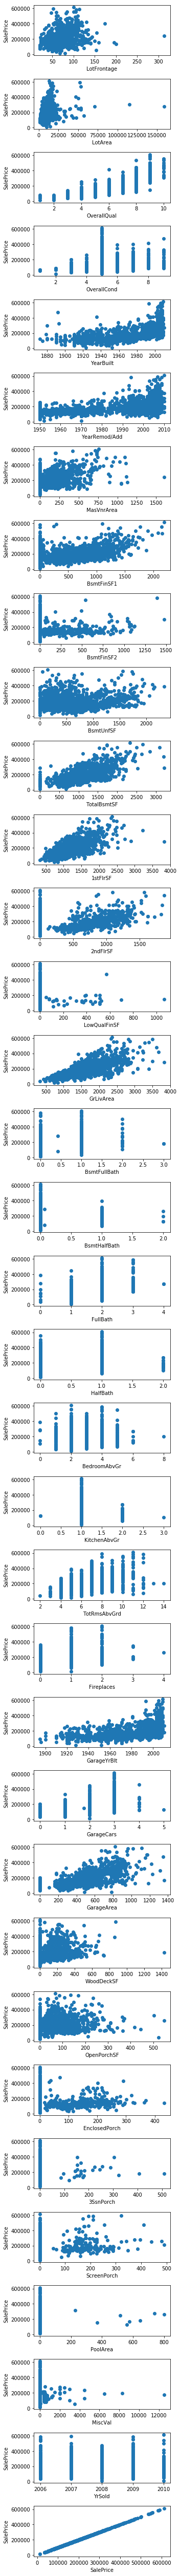

In [32]:
data = train.select_dtypes(exclude = object)
def scatter_func(df, ylabel):
    avg = np.mean(df.nunique())
    fig, ax = plt.subplots(ncols = 1, nrows = data.shape[1], figsize = (5,data.shape[1]*2))
    i=1
    for col in data:
        ax[i-1].scatter(data[col], df[ylabel])
        ax[i-1].set_xlabel(str(col))
        ax[i-1].set_ylabel(ylabel)
        i+=1
    plt.tight_layout()


%time scatter_func(data, 'SalePrice')

In [33]:
len(train.select_dtypes(exclude = object).columns)

35

## Review relationships for Categorical Features

In [34]:
train.select_dtypes(include=object).describe().T

,count,unique,top,freq
MSSubClass,2049,16,20,769
MSZoning,2049,7,RL,1596
Street,2049,2,Pave,2042
Alley,2049,3,None,1909
LotShape,2049,4,Reg,1295
LandContour,2049,4,Lvl,1843
Utilities,2049,3,AllPub,2047
LotConfig,2049,5,Inside,1502
LandSlope,2049,3,Gtl,1951
Neighborhood,2049,28,NAmes,310


In [35]:
categorical_columns = list(train.select_dtypes(include = 'object').columns)
# categorical_columns

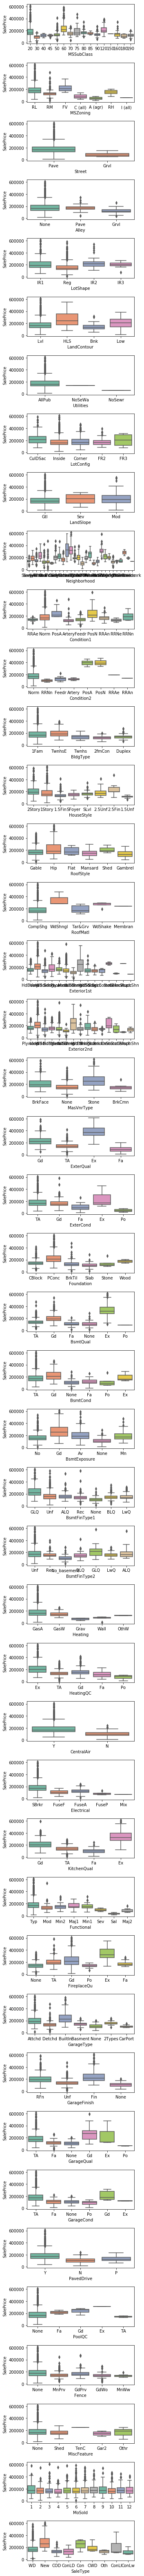

In [36]:
def boxplot_func(df, ylabel):
    data2 = df.select_dtypes(include = object)
    f, axes = plt.subplots(len(data2.columns), 1, figsize = (5,data2.shape[1]*2))
    for i, col in enumerate(data2.columns):
        sns.boxplot(col, ylabel, data=df, ax=axes[i], palette='Set2');
    plt.tight_layout()
boxplot_func(train,train['SalePrice'])

In [37]:
len(test.select_dtypes(exclude = object).columns)

34

### Exclude Utilities-feature from the modeling(, and of course, the price being modeled.)

In [38]:
train.drop('Utilities', axis=1, inplace=True)
test.drop('Utilities', axis=1, inplace=True)

In [39]:
test.index

Int64Index([2658, 2718, 2414, 1989,  625,  333, 1327,  858,   95, 1568,
            ...
             337, 2765, 1746,  368, 2806, 1662, 1234, 1373, 1672, 1939],
           dtype='int64', name='Id', length=879)

## Save cleaning results for next notebook

In [40]:
train.to_csv('../data/Ames_cleaning.csv', index=True)
test.to_csv('../data/AmesTest_cleaning.csv', index=True)

# Please continue to Notebook-2.